In [39]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from sklearn.preprocessing import StandardScaler


In [40]:
# Load datasets
train_data = pd.read_csv(r"train dataset")
test_data = pd.read_csv(r"test dataset")

In [41]:
# Separate target variable from training data
y_train = train_data['loan_status']
X_train = train_data.drop(columns=['loan_status'])
X_test = test_data  # Ensure test data does not contain 'loan_status'

# Handle missing values for numeric and non-numeric columns in training and test sets
for column in X_train.columns:
    if X_train[column].dtype == 'object':
        # Fill non-numeric columns with the mode (most frequent value)
        X_train[column].fillna(X_train[column].mode()[0], inplace=True)
        X_test[column].fillna(X_test[column].mode()[0], inplace=True)
    else:
        # Fill numeric columns with the mean
        X_train[column].fillna(X_train[column].mean(), inplace=True)
        X_test[column].fillna(X_test[column].mean(), inplace=True)


C:\Users\ranaj\AppData\Local\Temp\ipykernel_5152\1809829895.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[column].fillna(X_train[column].mean(), inplace=True)
C:\Users\ranaj\AppData\Local\Temp\ipykernel_5152\1809829895.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [42]:
# Preprocess categorical data
train_data['person_home_ownership'] = train_data['person_home_ownership'].replace({'RENT': 0, 'MORTGAGE': 1, 'OWN': 2, 'OTHER': 3})
train_data['loan_intent'] = train_data['loan_intent'].replace({'EDUCATION': 0, 'MEDICAL': 1, 'PERSONAL': 2, 'VENTURE': 3, 'DEBTCONSOLIDATION': 4, 'HOMEIMPROVEMENT': 5})
train_data['loan_grade'] = train_data['loan_grade'].replace({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6})
train_data['cb_person_default_on_file'] = train_data['cb_person_default_on_file'].replace({'N': 0, 'Y': 1})

test_data['person_home_ownership'] = test_data['person_home_ownership'].replace({'RENT': 0, 'MORTGAGE': 1, 'OWN': 2, 'OTHER': 3})
test_data['loan_intent'] = test_data['loan_intent'].replace({'EDUCATION': 0, 'MEDICAL': 1, 'PERSONAL': 2, 'VENTURE': 3, 'DEBTCONSOLIDATION': 4, 'HOMEIMPROVEMENT': 5})
test_data['loan_grade'] = test_data['loan_grade'].replace({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6})
test_data['cb_person_default_on_file'] = test_data['cb_person_default_on_file'].replace({'N': 0, 'Y': 1})


C:\Users\ranaj\AppData\Local\Temp\ipykernel_5152\1374587309.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['person_home_ownership'] = train_data['person_home_ownership'].replace({'RENT': 0, 'MORTGAGE': 1, 'OWN': 2, 'OTHER': 3})
C:\Users\ranaj\AppData\Local\Temp\ipykernel_5152\1374587309.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['loan_intent'] = train_data['loan_intent'].replace({'EDUCATION': 0, 'MEDICAL': 1, 'PERSONAL': 2, 'VENTURE': 3, 'DEBTCONSOLIDATION': 4, 'HOMEIMPROVEMENT': 5})
C:\Users\ra

In [43]:
# Define features and labels
X_train = train_data.drop(['id', 'loan_status'], axis=1)
y_train = train_data['loan_status']
X_test = test_data.drop(['id'], axis=1)

In [44]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Reshape data for CNN input (samples, time steps, features)
X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)


In [46]:
# Build CNN model
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    Dropout(0.3),
    Conv1D(32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

c:\Users\ranaj\anaconda3\envs\tf\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC', 'accuracy'])


In [48]:
# Train model
model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, validation_split=0.1, verbose=1)


Epoch 1/20
825/825 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8405 - accuracy: 0.8829 - loss: 0.2979 - val_AUC: 0.9292 - val_accuracy: 0.9296 - val_loss: 0.1960
Epoch 2/20
825/825 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9125 - accuracy: 0.9223 - loss: 0.2183 - val_AUC: 0.9313 - val_accuracy: 0.9318 - val_loss: 0.1892
Epoch 3/20
825/825 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9098 - accuracy: 0.9248 - loss: 0.2152 - val_AUC: 0.9314 - val_accuracy: 0.9321 - val_loss: 0.1860
Epoch 4/20
825/825 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9209 - accuracy: 0.9304 - loss: 0.2018 - val_AUC: 0.9314 - val_accuracy: 0.9342 - val_loss: 0.1834
Epoch 5/20
825/825 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9203 - accuracy: 0.9318 - loss: 0.1979 - val_AUC: 0.9330 - val_accuracy: 0.9330 - val_loss: 0.1830
Epoch 6/20
825/825 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9238 - accuracy: 0.9339 - loss: 0.1961 - val_AUC: 0.9345 - val_accuracy: 0.9405 - val_loss: 0.1779
Epoch 7/20
825/825 ━━━━━━━━━━━━━━━━━━━━ 

In [49]:
# Predict on test data
test_predictions = model.predict(X_test_scaled).flatten()
test_predictions_binary = (test_predictions > 0.5).astype(int)

1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step


In [50]:
# Save predictions
test_data['loan_status'] = test_predictions_binary
test_data[['id', 'loan_status']].to_csv('F:\CurrentWork\LoanApprovalPrediction\Loan Approval\predictions.csv', index=False)


In [51]:
# Plotting Actual vs. Predicted values (for validation within train set)
train_predictions = model.predict(X_train_scaled).flatten()
train_predictions_binary = (train_predictions > 0.5).astype(int)

1833/1833 ━━━━━━━━━━━━━━━━━━━━ 2s 974us/step


C:\Users\ranaj\AppData\Local\Temp\ipykernel_5152\1011079539.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start="2020-01-01", periods=len(actual_data), freq='M')  # Replace with actual dates


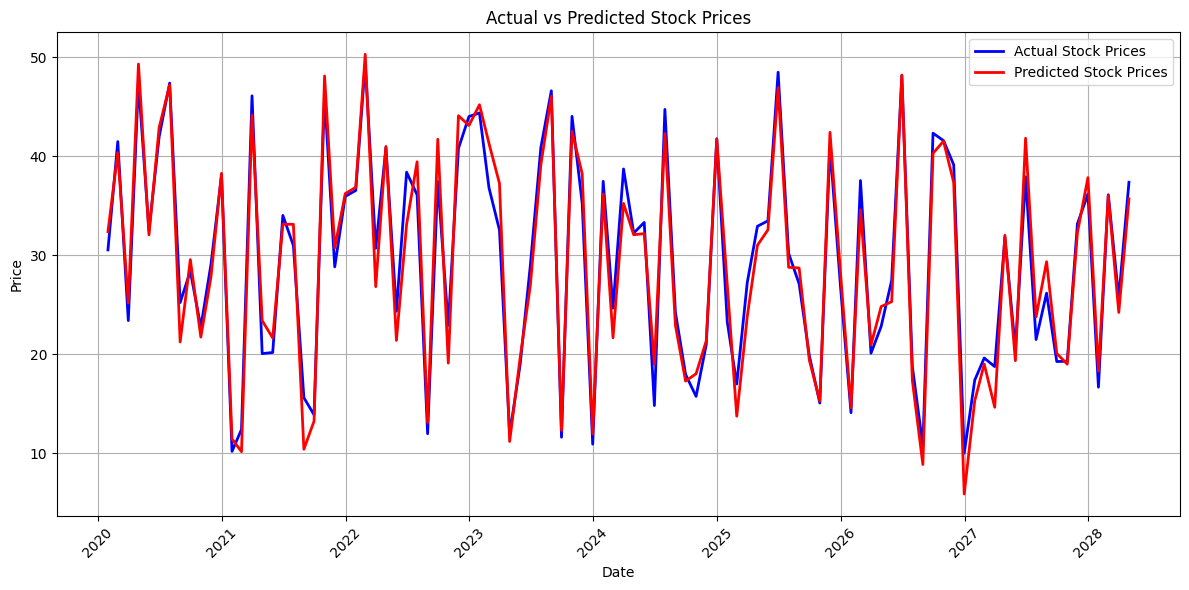

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have continuous predicted and actual data, for example:
# Replace these with your actual arrays of stock prices or similar data
actual_data = np.random.uniform(10, 50, size=100)  # Replace with actual values
predicted_data = actual_data + np.random.normal(0, 2, size=100)  # Replace with predicted values
dates = pd.date_range(start="2020-01-01", periods=len(actual_data), freq='M')  # Replace with actual dates

# Plot actual stock prices
plt.figure(figsize=(12, 6))
plt.plot(dates, actual_data, label='Actual Stock Prices', color='blue', linewidth=2)

# Plot predicted stock prices
plt.plot(dates, predicted_data, label='Predicted Stock Prices', color='red', linewidth=2)

# Formatting the plot
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for readability
plt.tight_layout()  # Adjust the layout for better fit

# Show the plot
plt.show()
